    In this notebook, I'd like to take some time to explore the parameters that we will use to model Kingston.

In [1]:
import yaml
import os

project_root = os.path.dirname(os.path.dirname(os.path.abspath("kingston.ipynb")))

config_dir = os.path.join('src', 
                                'covid19sim', 
                                'configs', 
                                'simulation', 
                                'region')

montreal_path = os.path.join(project_root, config_dir, 'montreal.yaml')

montreal_dict = {}

with open(os.path.abspath(montreal_path)) as f:
    montreal_dict = yaml.load(f, Loader=yaml.FullLoader)
    
len(montreal_dict)

110

In [63]:
[k for k in montreal_dict.keys()]

['POPULATION_SIZE_REGION',
 'P_AGE_REGION',
 'AVERAGE_AGE_REGION',
 'MEDIAN_AGE_REGION',
 'AVG_HOUSEHOLD_SIZE',
 'P_HOUSEHOLD_SIZE',
 'N_HOUSESIZE_1',
 'P_FAMILY_TYPE_SIZE_2',
 'P_FAMILY_TYPE_SIZE_3',
 'P_FAMILY_TYPE_SIZE_4',
 'P_FAMILY_TYPE_SIZE_MORE_THAN_5',
 'P_MULTIGENERATIONAL_FAMILY',
 'P_MULTIGENERTIONAL_FAMILY_GIVEN_OTHER_HOUSEHOLDS',
 'N_COLLECTIVE_RESIDENTS',
 'N_COLLECTIVE_RESIDENTS_65_79',
 'N_COLLECTIVE_RESIDENTS_80_above',
 'MAX_AGE_CHILDREN',
 'MAX_AGE_WITH_PARENT',
 'AGE_DIFFERENCE_BETWEEN_PARENT_AND_KID',
 'N_RESIDENTS_PER_COLLECTIVE',
 'P_EMPLOYEES_1_4_PER_WORKPLACE',
 'P_EMPLOYEES_5_99_PER_WORKPLACE',
 'P_EMPLOYEES_100_499_PER_WORKPLACE',
 'P_EMPLOYEES_500_above_PER_WORKPLACE',
 'AVERAGE_N_EMPLOYEES_PER_WORKPLACE',
 'P_EMPLOYEES_1_4_PER_STORE',
 'P_EMPLOYEES_5_99_PER_STORE',
 'P_EMPLOYEES_100_499_PER_STORE',
 'P_EMPLOYEES_500_above_PER_STORE',
 'AVERAGE_N_EMPLOYEES_PER_STORE',
 'N_STORE_PER_1K_PEOPLE',
 'P_EMPLOYEES_1_4_PER_MISC',
 'P_EMPLOYEES_5_99_PER_MISC',
 'P_EM

In [5]:
import pandas as pd

p_age_montreal_df = pd.DataFrame(montreal_dict['P_AGE_REGION'], columns=["min", "max", "p"])

p_age_montreal_df

,min,max,p
0,0,4,0.057
1,5,9,0.054
2,10,14,0.047
3,15,19,0.050
4,20,24,0.072
5,25,29,0.079
6,30,34,0.078
7,35,39,0.076
8,40,44,0.066
9,45,49,0.065


<AxesSubplot:ylabel='Frequency'>

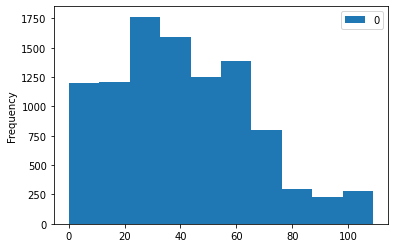

In [51]:
from numpy.random import default_rng
rng = default_rng()

age_montreal_df = pd.DataFrame(
    [rng.integers(p_age_montreal_df["min"][idx], 
              p_age_montreal_df["max"][idx]) for idx in 
    rng.choice(range(len(p_age_montreal_df)), 
           size=10000, 
           p=p_age_montreal_df["p"])])

age_montreal_df.plot.hist()

I'd like to compare regional parameters for Montreal to the country-wide parameters for Canada used in the PHAC paper

In [6]:
canada_path = os.path.join(project_root, config_dir, 'canada.yaml')

canada_dict = {}

with open(os.path.abspath(canada_path)) as f:
    canada_dict = yaml.load(f, Loader=yaml.FullLoader)
    
    len(canada_dict)

110

In [45]:
p_age_canada_df = pd.DataFrame(canada_dict['P_AGE_REGION'], columns=["min", "max", "proportion"])

p_age_canada_df

,min,max,proportion
0,0,4,0.051695
1,5,9,0.054254
2,10,14,0.054052
3,15,19,0.056256
4,20,44,0.338052
5,45,54,0.130332
6,55,64,0.139970
7,65,74,0.101182
8,75,84,0.051903
9,85,110,0.022301


In [46]:
1 - sum(p_age_canada_df["proportion"][0:9]) 

0.02230399999999988

In [47]:
p_age_canada_df["p"] = p_age_canada_df["proportion"]
p_age_canada_df["p"][9] = 1 - sum(p_age_canada_df["proportion"][0:9]) 
p_age_canada_df

<ipython-input-47-27207d204a4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_age_canada_df["p"][9] = 1 - sum(p_age_canada_df["proportion"][0:9])


,min,max,proportion,p
0,0,4,0.051695,0.051695
1,5,9,0.054254,0.054254
2,10,14,0.054052,0.054052
3,15,19,0.056256,0.056256
4,20,44,0.338052,0.338052
5,45,54,0.130332,0.130332
6,55,64,0.139970,0.139970
7,65,74,0.101182,0.101182
8,75,84,0.051903,0.051903
9,85,110,0.022301,0.022304


<AxesSubplot:title={'center':'Montreal'}, ylabel='Density'>

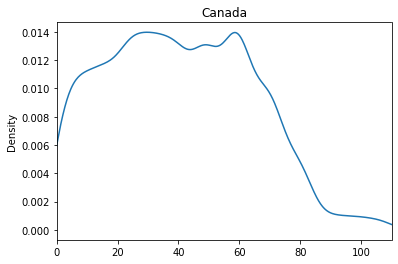

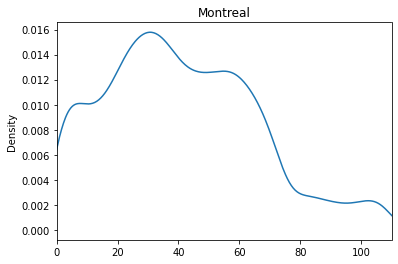

In [61]:
age_canada_df = pd.DataFrame(
    [rng.integers(p_age_canada_df["min"][idx], 
              p_age_canada_df["max"][idx]) for idx in 
    rng.choice(range(len(p_age_canada_df)), 
           size=10000, 
           p=p_age_canada_df["p"])])

age_canada_df.plot.kde(title="Canada", 
                       xlim=(0,110),
                      legend=False)

age_montreal_df.plot.kde(title="Montreal", 
                         xlim=(0,110),
                        legend=False)

How does Kingston compare?

<AxesSubplot:title={'center':'Kingston'}, ylabel='Density'>

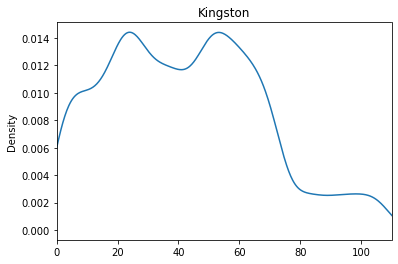

In [60]:
kingston_path = os.path.join(project_root, config_dir, 'kingston.yaml')

kingston_dict = {}

with open(os.path.abspath(kingston_path)) as f:
    kingston_dict = yaml.load(f, Loader=yaml.FullLoader)
    
p_age_kingston_df = pd.DataFrame(kingston_dict['P_AGE_REGION'], columns=["min", "max", "p"])

age_kingston_df = pd.DataFrame(
    [rng.integers(p_age_kingston_df["min"][idx], 
              p_age_kingston_df["max"][idx]) for idx in 
    rng.choice(range(len(p_age_kingston_df)), 
           size=10000, 
           p=p_age_kingston_df["p"])])

age_kingston_df.plot.kde(title="Kingston", 
                         xlim=(0,110),
                        legend=False)

What is it about Kingston's unique demographics that could effect how Covid spreads?